## Sales Prediction

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## Data Preprocessing

#### Checking null values

In [3]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

#### Checking no. of columns and rows

In [4]:
df.shape

(200, 4)

In [5]:
print(f"This DataSet Contains {df.shape[0]} rows & {df.shape[1]} columns")

This DataSet Contains 200 rows & 4 columns


#### Describing the Dataset

In [6]:
df.describe(include = "all").T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


### Data Analyzes

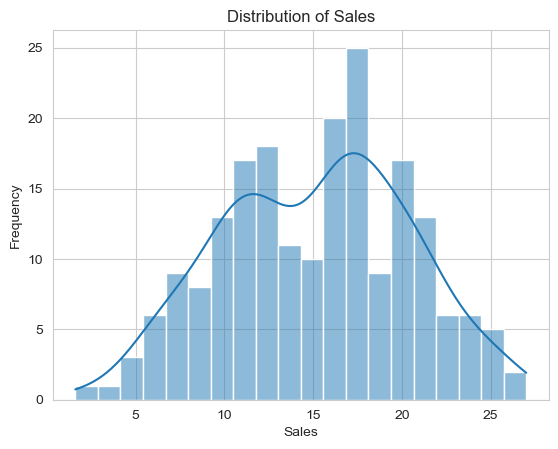

In [10]:
sns.histplot(df['Sales'], bins=20, kde=True)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

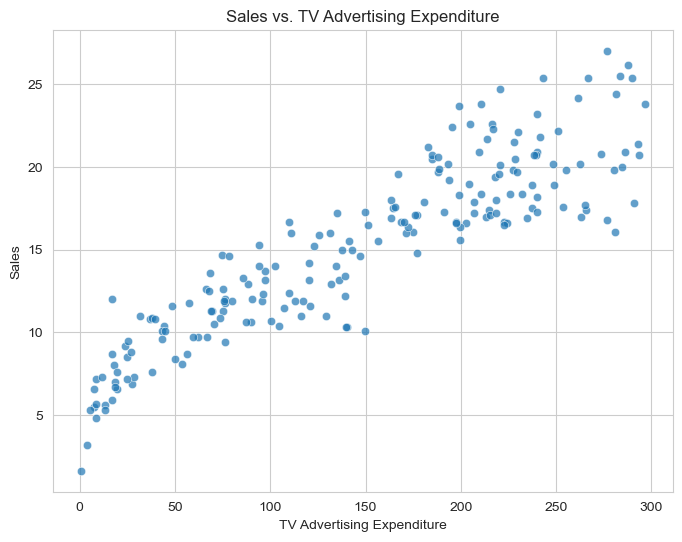

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TV', y='Sales', data=df, alpha=0.7)
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Sales vs. TV Advertising Expenditure')
plt.grid(True)
plt.show()

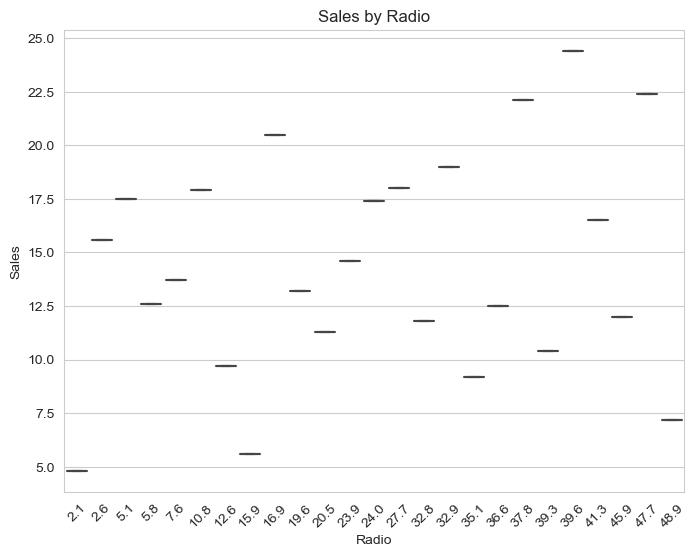

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Radio', y='Sales', data=df.head(25))
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Sales by Radio')
plt.xticks(rotation=45)
plt.show()

### Handeling Outliers in the dataset

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


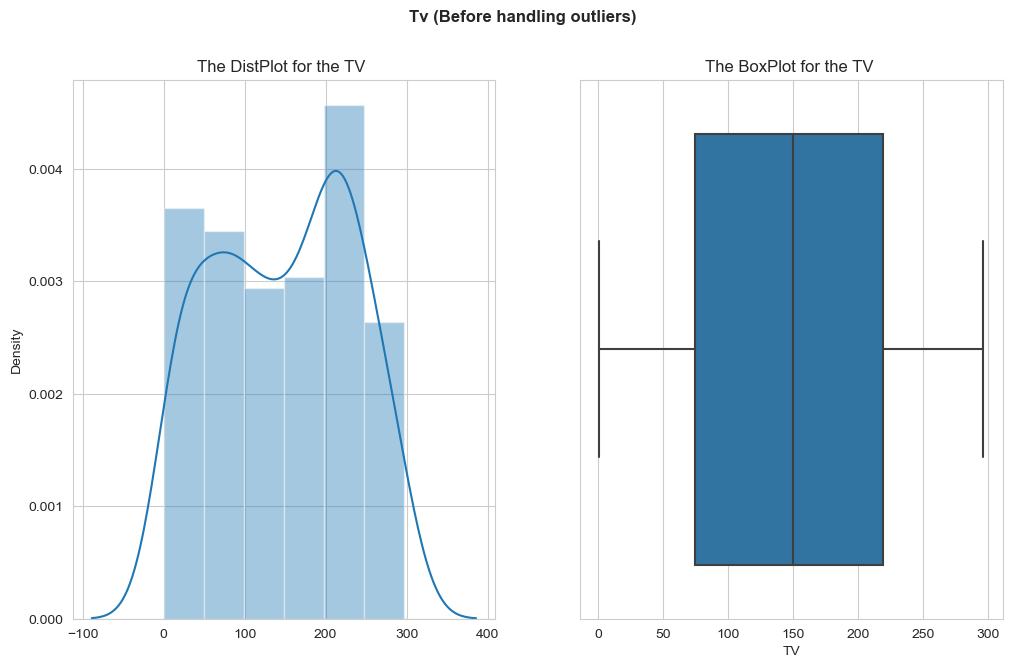

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


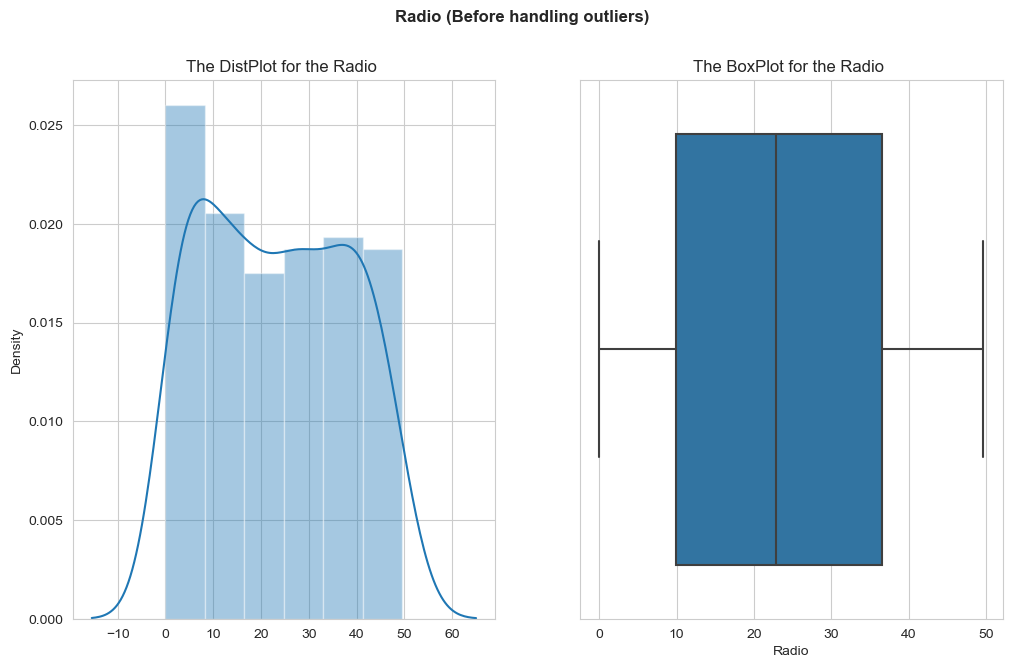

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


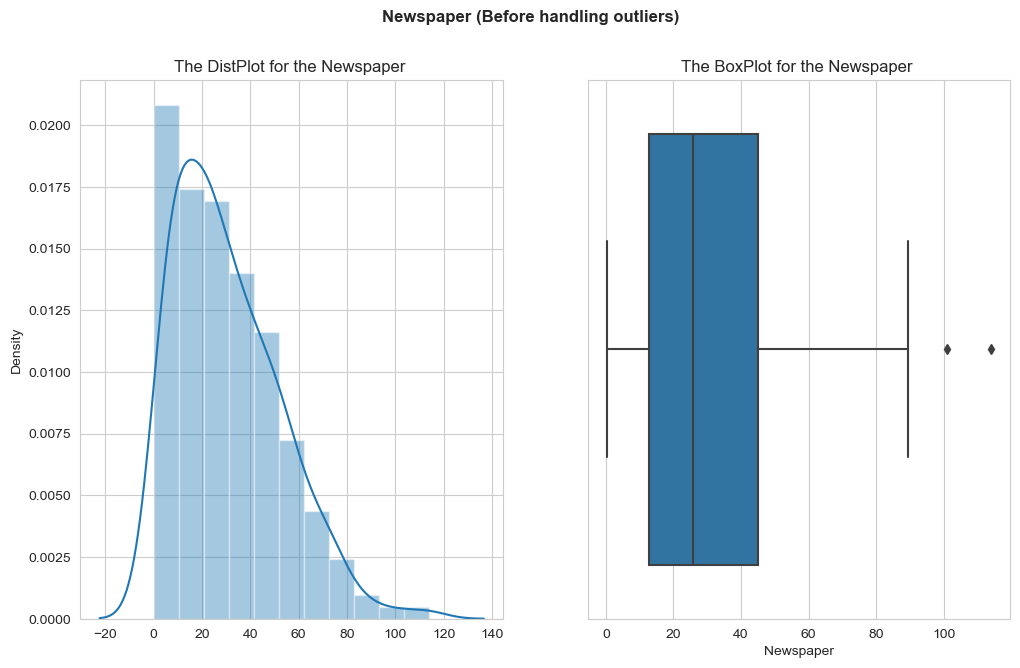

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


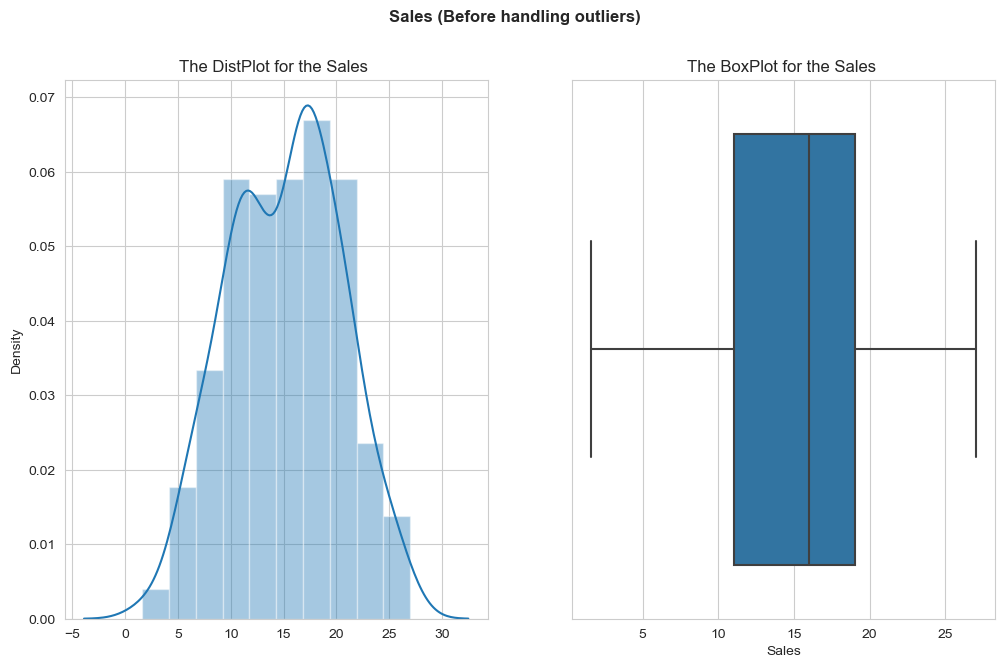

In [15]:
for col in df.select_dtypes(exclude = "object" ):
    plt.figure(figsize=(12,7))
    plt.subplot(1,2,1)
    sns.distplot(x = df[col]);
    plt.title(f'The DistPlot for the {col} ')
    plt.subplot(1,2,2)
    sns.boxplot(x = df[col]);
    plt.title(f'The BoxPlot for the {col} ')
    plt.suptitle(f'{col.title()} (Before handling outliers)',weight='bold')
    plt.show()

In [16]:
def outlier_handle(data):
    df1_copy = df.copy()
    for col_name in data.select_dtypes(exclude="object"):
        q1 = data[col_name].quantile(0.25)
        q3 = data[col_name].quantile(0.75)
        iqr = q3-q1  #IQR
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df1_copy.loc[:,  col_name] = np.where(data[col_name]> fence_high, fence_high,
                                         np.where(data[col_name]< fence_low, fence_low,
                                                  data[col_name]))
    return df1_copy
df1 = outlier_handle(df)

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


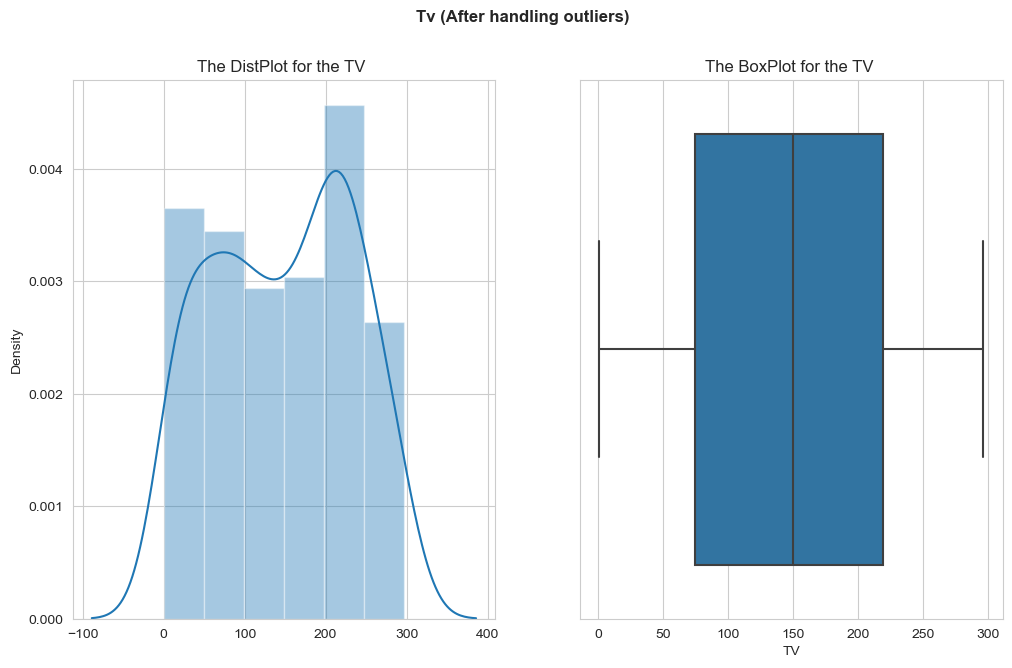

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


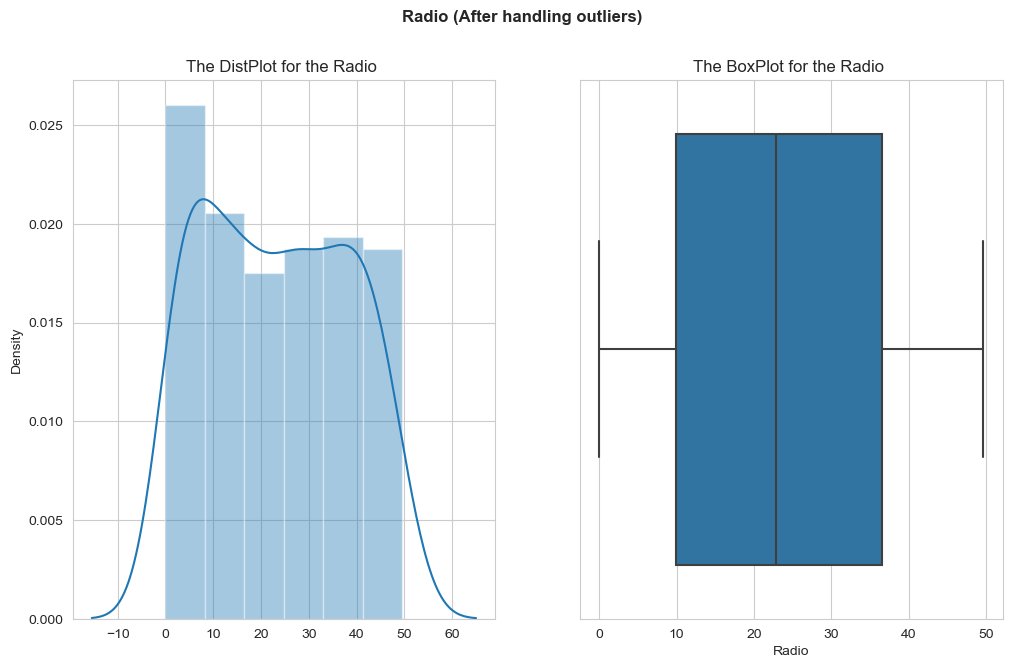

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


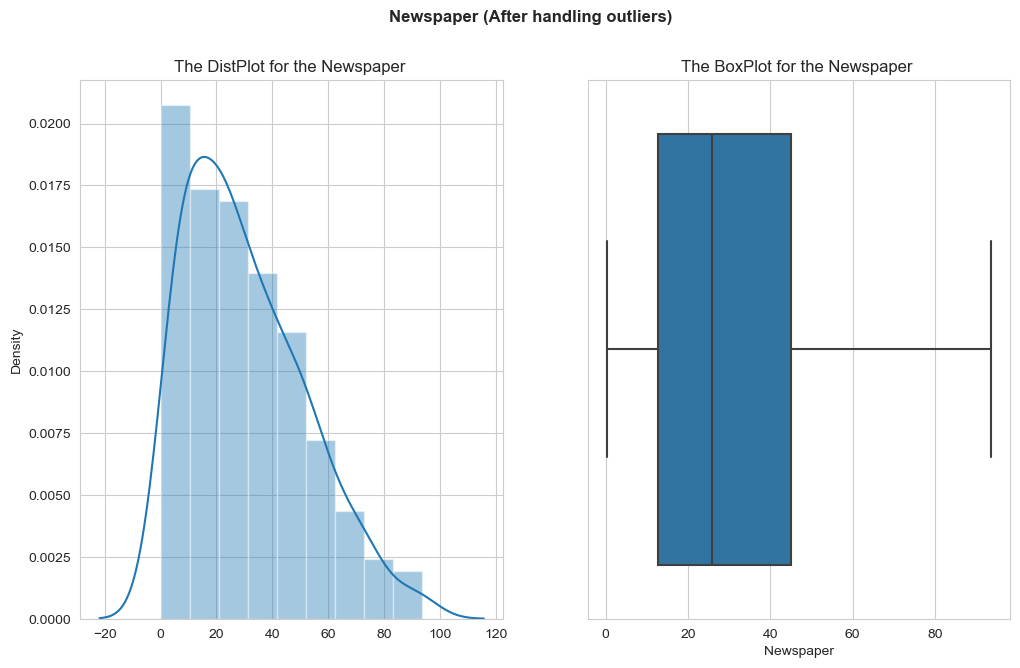

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


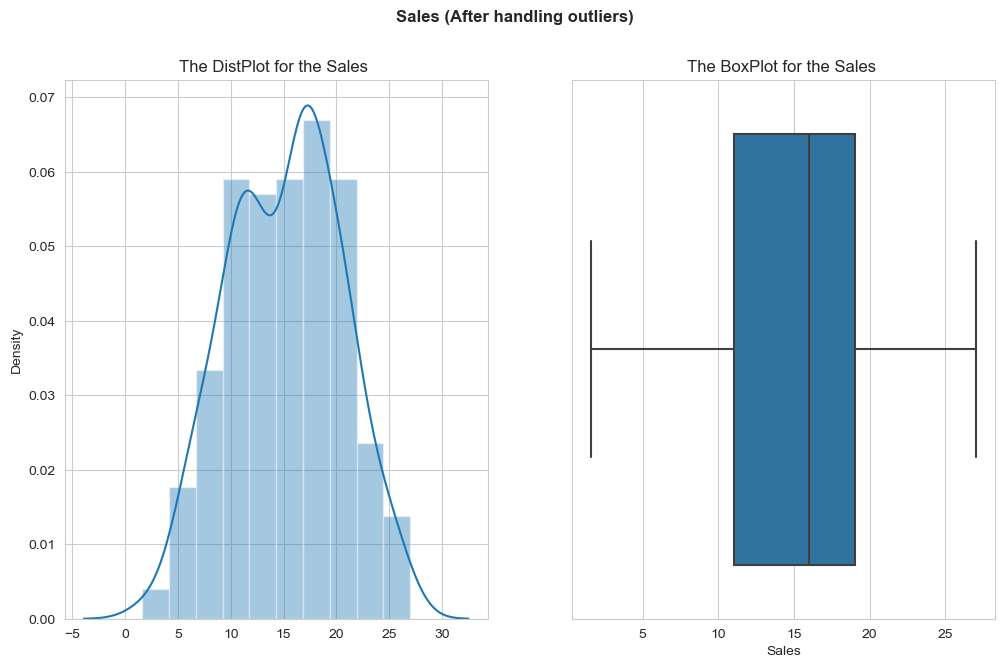

In [17]:
for col in df1.select_dtypes(exclude = "object" ):
    plt.figure(figsize=(12,7))
    plt.subplot(1,2,1)
    sns.distplot(x = df1[col]);
    plt.title(f'The DistPlot for the {col} ')
    plt.subplot(1,2,2)
    sns.boxplot(x = df1[col]);
    plt.title(f'The BoxPlot for the {col} ')
    plt.suptitle(f'{col.title()} (After handling outliers)',weight='bold')
    plt.show()

<Figure size 1500x1500 with 0 Axes>

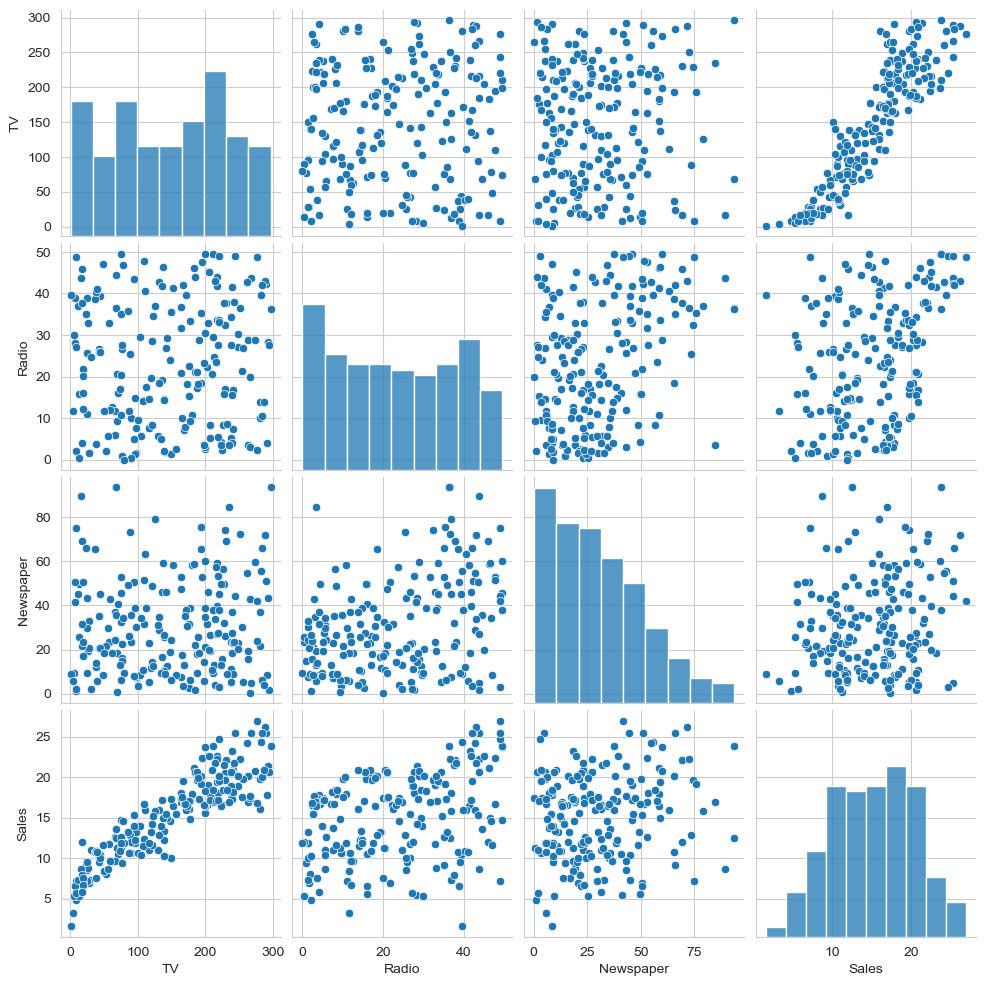

In [18]:
plt.figure(figsize=(15,15))
sns.pairplot(df1)
plt.show()

## Data Modeling

### Linear Regression Model

In [19]:
df1

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [20]:
X = df1.iloc[:,:-1]
Y = df1['Sales']

In [21]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [22]:
Y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size= 0.25 ,random_state=50)

In [24]:
print("x_train =", x_train.shape)
print("x_test =", x_test.shape)
print()
print("y_train =", y_train.shape)
print("y_test =", y_test.shape)

x_train = (150, 3)
x_test = (50, 3)

y_train = (150,)
y_test = (50,)


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

In [26]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

LinearRegression()

In [27]:
y_pred = linear_regressor.predict(x_test)
lr = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
lr

,y_test,y_pred
112,17.1,15.751001
165,16.9,18.191322
12,9.2,9.753364
73,11.0,12.344159
144,12.3,11.497224
20,18.0,19.656675
199,18.4,18.191220
8,4.8,5.142539
39,21.5,21.109658
88,12.9,12.356389


In [28]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(np.sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 1.091
Mean Squared Error of the model is : 1.892
Root Mean Squared Error of the model is : 1.375
R-squared value of the model is : 0.903


### Random Forest Model

In [29]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size= 0.25 ,random_state=50)

In [30]:
print("x_train =", x_train.shape)
print("x_test =", x_test.shape)
print()
print("y_train =", y_train.shape)
print("y_test =", y_test.shape)

x_train = (150, 3)
x_test = (50, 3)

y_train = (150,)
y_test = (50,)


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

In [32]:
from sklearn.ensemble import RandomForestRegressor
Rf = RandomForestRegressor(n_estimators=100, random_state=42)
Rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
y_pred = Rf.predict(x_test)
y_pred = Rf.predict(x_test)
rf= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
rf

,y_test,y_pred
112,17.1,17.522
165,16.9,17.214
12,9.2,8.753
73,11.0,12.315
144,12.3,11.698
20,18.0,18.595
199,18.4,18.265
8,4.8,5.085
39,21.5,21.875
88,12.9,12.924


In [34]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(np.sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 0.906
Mean Squared Error of the model is : 1.693
Root Mean Squared Error of the model is : 1.301
R-squared value of the model is : 0.913


## Result

Based on the results, Random Forest has better accuracy than Linear Regression for the Sales dataset.